**Objective:** 

Compare dependence of first order and texture features on image artifact hadling method:
* Calculate features from original images.
* Remove slices before calculating first order and texture features.

In [2]:
import os
import nrrd

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from ioutil import sample_paths

%matplotlib inline

# T-test

https://pythonfordatascience.org/paired-samples-t-test-python/
https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

**FYI**:
* The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other.
* The t test also tells you how significant the differences are.
* In other words it lets you know if those differences could have happened by chance.

**t-score**:
* The t score is a ratio between the difference between two groups and the difference within the groups.
* The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups.
* A t score of 3 means that the groups are three times as different from each other as they are within each other. * When you run a t test, the bigger the t-value, the more likely it is that the results are repeatable.

**In conclusion**:
* A large t-score tells you that the groups are different.
* A small t-score tells you that the groups are similar.

**Rationale**
* The point is that 

In [6]:
first_order = {
    'all_slices': pd.read_csv(
        './../../data_source/to_analysis/original_images/firstorder_original_images.csv',
        index_col=0
    ),
    'slice_drop_1200': pd.read_csv(
        './../../data_source/to_analysis/slice_drop_ct1200/firstorder_slice_drop_ct1200.csv',
        index_col=0
    ),
    'slice_drop_1300': pd.read_csv(
        './../../data_source/to_analysis/slice_drop_ct1300/firstorder_slice_drop_ct1300.csv',
        index_col=0
    ),
    'slice_drop_1400': pd.read_csv(
        './../../data_source/to_analysis/slice_drop_ct1400/firstorder_slice_drop_ct1400.csv',
        index_col=0
    ),
    'slice_drop_1500': pd.read_csv(
        './../../data_source/to_analysis/slice_drop_ct1500/firstorder_slice_drop_ct1500.csv',
        index_col=0
    )
}
texture = {
        pd.read_csv(
        './../../data_source/to_analysis/original_images/firstorder_original_images.csv', 
        index_col=0
    ),
    'slice_drop_1200': pd.read_csv(
        './../../data_source/to_analysis/slice_drop_ct1200/texture_slice_drop_ct1200.csv', 
        index_col=0
    ),
    'slice_drop_1300': pd.read_csv(
        './../../data_source/to_analysis/slice_drop_ct1300/texture_slice_drop_ct1300.csv', 
        index_col=0
    ),
    'slice_drop_1400': pd.read_csv(
        './../../data_source/to_analysis/slice_drop_ct1400/texture_slice_drop_ct1400.csv', 
        index_col=0
    ),
    'slice_drop_1500': pd.read_csv(
        './../../data_source/to_analysis/slice_drop_ct1500/texture_slice_drop_ct1500.csv', 
        index_col=0
    ),
}

# Fractional reduction in tumor volume

In [ ]:
# NOTE: 
# * Use this as metric in determining if thredhold value is OK. From article, features with
#   rv > 0.5 was deemed not robust.
def range_variation_metric(x_red_i, x_full_i, x_full):
    """
    Args:
        x_red (): Feature value for patient i at reduced tumor volume.
        x_full_i (): Feature value for patient i at full tumor volume.
        x_full (): Feature values for all patients at full tumor volume.
    
    """
    
    # NOTE: Use range in article of feature values calculated from 
    # multiple tumor volume reductions.
    sr_i = x_red_i / x_full_i
    rv = sr_i / (np.std(x_full) / np.mean(x_full))

In [6]:
# TODO: Read masks from either dir and sum together voxels. Since each voxel is of size 1mm3, the volume = sum of 
# voxels mm^3. The fraction is unitless!

# NOTE: 
# * From article: On average, 3.0cm^3 of GTV had to be removed to eliminate streak artifacts 
#   (standard deviation: 4.0cm3, range: 0.11–28cm3)).
# * feature values were generally robust when up to 50% of the GTV was removed, but having only a 
#   small fraction (less than 50%) of the GTV remaining in the ROI caused very large differences in feature values. 


path_to_masks = sample_paths(
    './../../data_source/images/masks_slice_drop_ct1300_nrrd',
    './../../data_source/images/masks_nrrd',
    target_format='nrrd'
)
volume_fracs = []
for paths in path_to_masks:
    
    red_mask, _ = nrrd.read(paths['Image'])
    orig_mask, _ = nrrd.read(paths['Mask'])
    
    volume_fracs.append(float(np.sum(red_mask) / np.sum(orig_mask)))

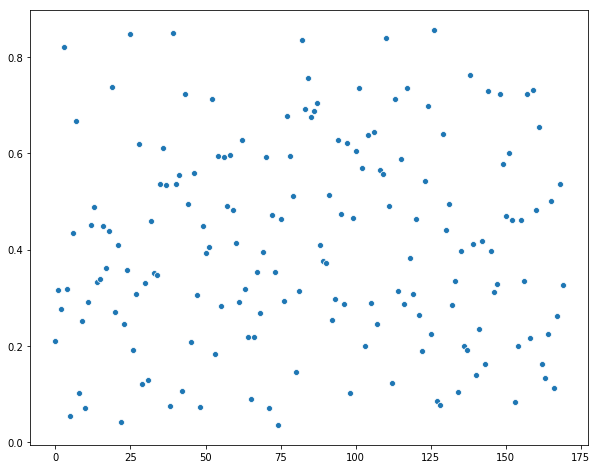

In [7]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    range(np.size(volume_fracs)), volume_fracs
)

# Comparing First Order Features

In [ ]:
firstorder_no_prep = pd.read_csv(
    './../../data_source/to_analysis/original_images/firstorder_original_images.csv',
    index_col=0
)
firstorder_no_prep.head()

In [ ]:
firstorder_1300ct = pd.read_csv(
    './../../data_source/to_analysis/slice_drop_ct1300/firstorder_slice_drop_ct1300.csv',
    index_col=0
)
firstorder_1300ct.head()

In [ ]:
# TODO: 
# Plot variance between first order feature sets calculated after different image processing techniques.

# Comparing Texture Features

In [ ]:
texture_original_images = pd.read_csv(
    './../../data_source/to_analysis/original_images/texture_original_images.csv',
    index_col=0
)

In [ ]:
# TODO: 
# Plot variance between texture feature sets calculated after different image processing techniques.